In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score, precision_score, f1_score,log_loss ,matthews_corrcoef, confusion_matrix, accuracy_score, log_loss, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import IPython.display as ipd
import warnings
%matplotlib inline

In [2]:
path = "/kaggle/input/nslkdd/KDDTrain+.txt"

In [3]:
columns = pd.read_csv("/kaggle/input/nsl-kdd-data-types/kddcup.names", names=['names'])
attacks = pd.read_csv("/kaggle/input/nsl-kdd-data-types/attack.types", sep=" ", names=["class", "attack"])
df = pd.read_csv("/kaggle/input/nslkdd/KDDTrain+.txt", names=columns["names"])

In [4]:
def update_columns(df, attacks):
    attacks = attacks.set_index("class").T.to_dict("index")
    df = df.drop("target", axis=1)
    df["attack_type"] = df["class"].map(attacks["attack"])
    df['connection_type'] = np.where(df['attack_type']=='normal', 'normal', 'attack')
    return df

In [5]:
df = update_columns(df, attacks)

In [6]:
def pie_plots(df, title):
    columns = ['protocol_type', 'attack_type', 'connection_type']
    columns_count = len(columns)
    fig, ax = plt.subplots(nrows=columns_count,
                           ncols=1,
                           figsize=(10,10))
    for i in range(columns_count):
        _dict = df[columns[i]].value_counts().to_dict()
        ax[i].pie(_dict.values())
        ax[i].set(title=f"{columns[i]} distribution")
        ax[i].legend(loc="upper right", labels=_dict.keys(), bbox_to_anchor=(1.55,0.75), title=f"{columns[i]}")
    fig.suptitle(f"{title} data distribution", fontsize=16, fontweight="bold")

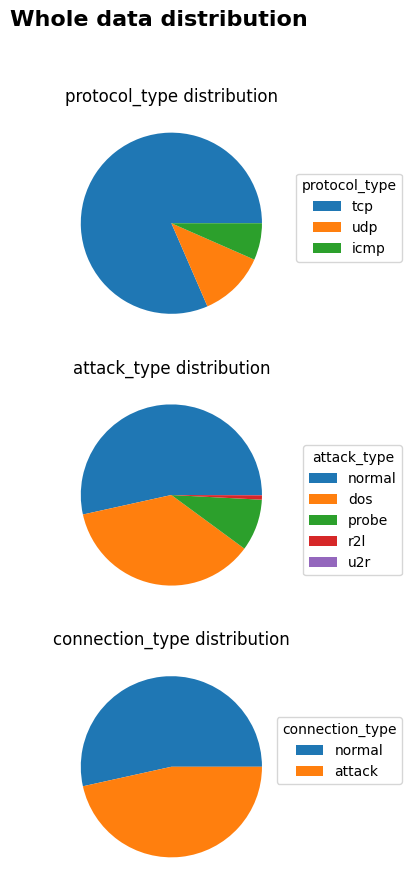

In [7]:
pie_plots(df, "Whole")

In [8]:
def correlation(df):
    df = df.select_dtypes(exclude=['object']) 
    df = df[[col for col in df if df[col].nunique() > 1]]
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15,12))
    ax = sns.heatmap(corr)
    plt.show()

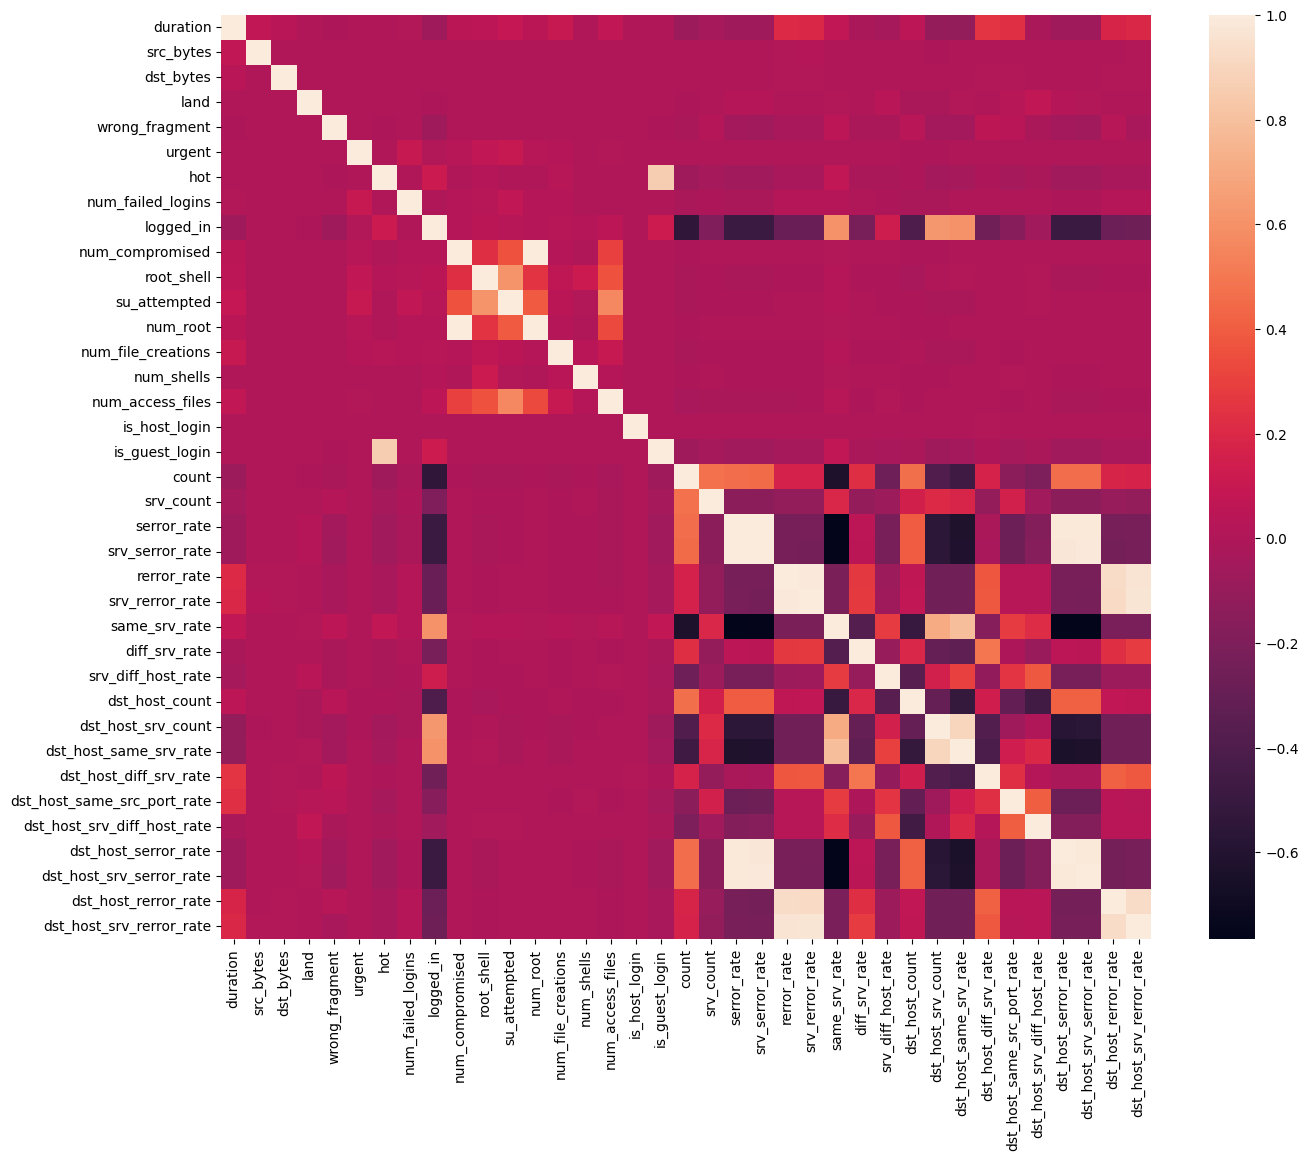

In [9]:
correlation(df)

# **Pre-Processing**

In [10]:
df = df.drop(['class', 'connection_type'], axis=1)

In [11]:
def encoding(df):
    columns = df.select_dtypes('object').columns.to_list()
    for column in columns:
        uniq = df[column].unique().tolist()
        _dict = {}
        for i in range(len(uniq)):
            _dict[uniq[i]] = i
        df[column] = df[column].map(_dict)
    return df

In [12]:
df = encoding(df)

In [13]:
df.shape

(125973, 42)

In [14]:
df.keys()

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')

In [15]:
df.dropna(inplace = True)

In [16]:
df['attack_type'].value_counts()

attack_type
0    67343
1    45927
3    11656
2      995
4       52
Name: count, dtype: int64

In [17]:
df['attack_type'] = df['attack_type'].replace({2: 1, 3: 1, 4: 1})

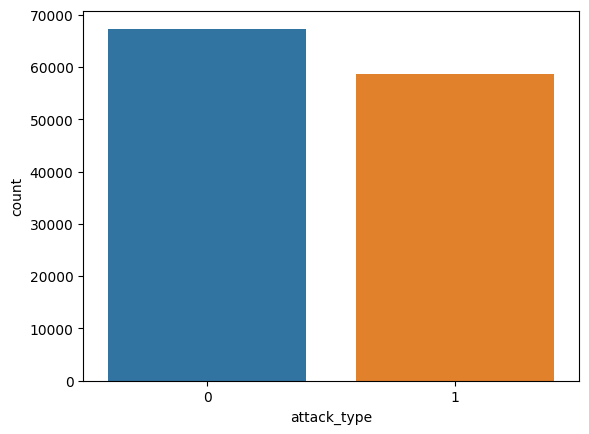

In [18]:
sns.countplot(x='attack_type', data=df)
plt.show()

In [19]:
X = df.drop(columns=['attack_type'])
y = df['attack_type']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Boasting (Adaboast Classifier) {1}** #

In [21]:
template = DecisionTreeClassifier(max_depth=5)

In [22]:
classificationEnsemble = AdaBoostClassifier(estimator=template,
                                             n_estimators=100,
                                             learning_rate=0.1)

In [23]:
classificationEnsemble.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=100)

In [24]:
y_pred1 = classificationEnsemble.predict(X_test)

In [25]:
Accuracy1 = accuracy_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)
mcc1 = matthews_corrcoef(y_test, y_pred1)

In [26]:
print("NSL-KDD Dataset Boasting")
print('Accuracy:', Accuracy1*100)
print('Recall:', recall1*100)
print('Precision:', precision1*100)
print('F1 Score:', f11*100)
print('MCC Score:', mcc1*100)

NSL-KDD Dataset Boasting
Accuracy: 99.88489779718198
Recall: 99.83011976556527
Precision: 99.92348240095222
F1 Score: 99.87677926492458
MCC Score: 99.76883033697874


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


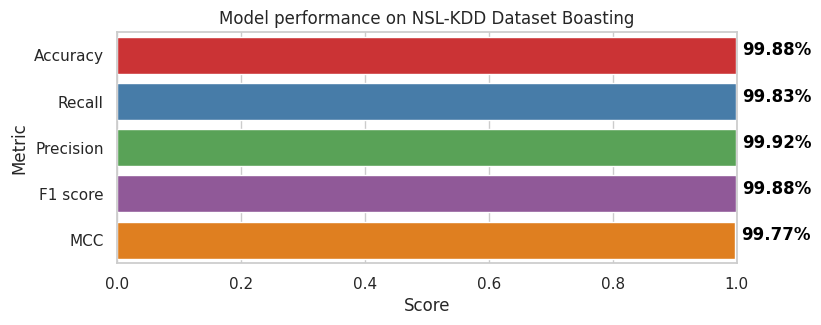

In [27]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy1, recall1, precision1, f11,mcc1]  

sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f'{v * 100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title("Model performance on NSL-KDD Dataset Boasting")

plt.show()

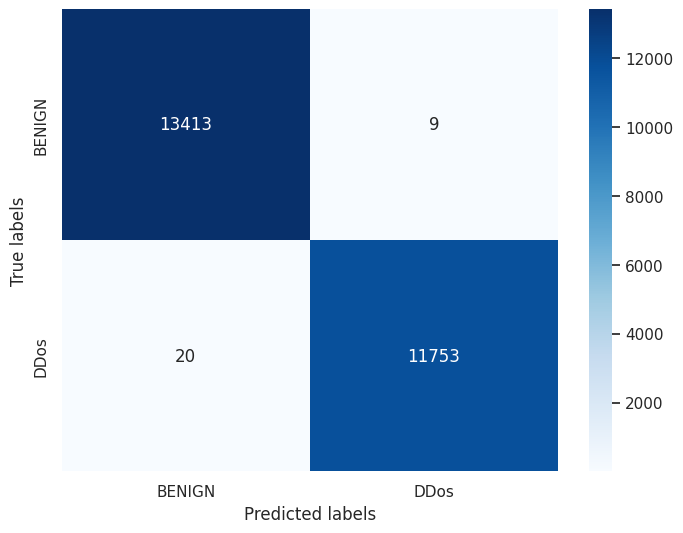

In [28]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# **Bagging** #

In [29]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [30]:
bagging = BaggingClassifier(estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)

In [31]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5),
                  max_features=0.8, max_samples=0.8, n_estimators=100)

In [32]:
y_pred2 = bagging.predict(X_test)

In [33]:
Accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
mcc2 = matthews_corrcoef(y_test, y_pred2)

In [34]:
print("NSL-KDD Dataset Bagging")
print('Accuracy:', Accuracy2*100)
print('Recall:', recall2*100)
print('Precision:', precision2*100)
print('F1 Score:', f12*100)
print('MCC Score:', mcc2*100)

NSL-KDD Dataset Bagging
Accuracy: 98.50764040484223
Recall: 97.10354200288796
Precision: 99.69477631464201
F1 Score: 98.38209982788297
MCC Score: 97.0266145339598


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


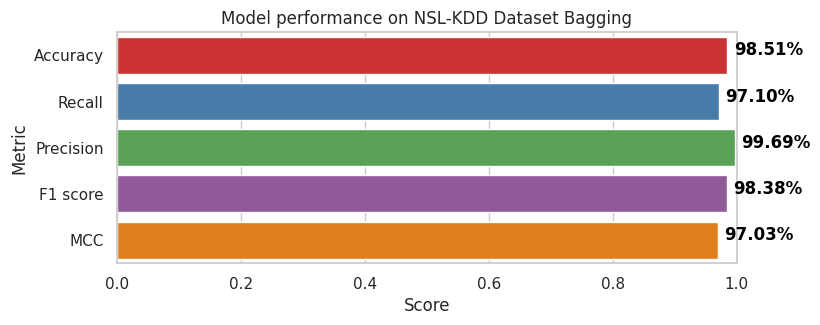

In [35]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy2, recall2, precision2, f12,mcc2]  

sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f'{v * 100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title("Model performance on NSL-KDD Dataset Bagging")

plt.show()


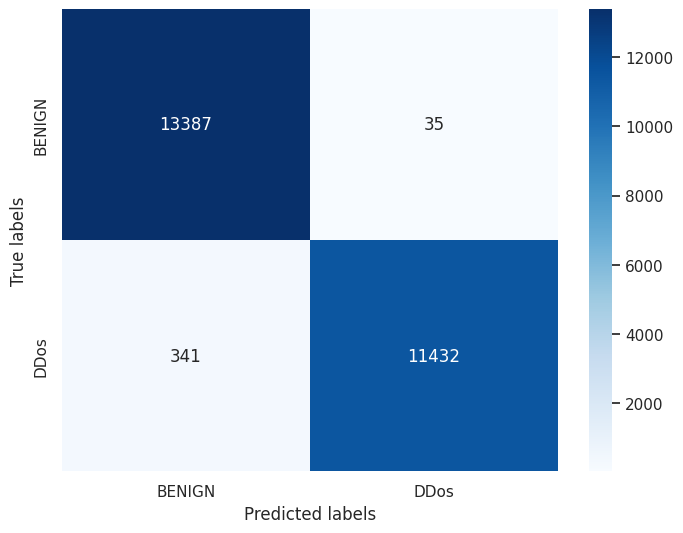

In [36]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()